# Lab 6 Report

Prepared by Zech Wolf

## 1. Data preparation

The dataset used is the handwritten letters dataset from EMNIST. There are 26 classes for each of the letters in the Roman alphabet. The full dataset contains over 145,000 instances. The provided training set is used as the full dataset for this report (about 88,000 instances). Each instance is a 28x28 grayscale image containing a handwritten letter.

Dataset source: https://www.kaggle.com/datasets/crawford/emnist?resource=download&select=emnist-letters-train.csv (processed into .csv format from original source)

### 1.1 Performance metrics

A possible business case for this dataset is optical character recognition (OCR), which converts text from an image into digital text on a computer. A classification model trained on this dataset could be used to process handwriting.

The proper metric is accuracy, since all classes are equally important, and the dataset is balanced.

### 1.2 Cross validation method

With nearly 90,000 instances, the dataset is very large. The dataset is also balanced by class. For these reasons, a stratified 80/20 split should be suitable for training and testing. Of the 80% training set, 10% will be set aside as validation data.

In [1]:
import pandas as pd

df = pd.read_csv("datasets/emnist-letters-train.csv")
df["23"] -= 1 #adjust class label to be range 0-25 instead of 1-26

In [2]:
import numpy as np

X = df.drop(columns=df.columns[0]).to_numpy(dtype=np.float32)
X = X.reshape((len(X),28,28,1))  #reshape to tensor format
X /= 255 #normalize images to interval [0,1]

y = df[df.columns[0]].to_numpy()

NUM_CLASSES = 26

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1, random_state=1234)

#OHE encode the labels
y_train_ohe = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val_ohe = tf.keras.utils.to_categorical(y_val, NUM_CLASSES)
y_test_ohe = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

## 2. Modeling

### 2.1 Data augmentation and preprocessing

Random rotations and random brightness changes are applied to the dataset as preprocessing steps. Image normalization is also performed to scale the pixel values to the range [0,1]

In [6]:
import tensorflow as tf

preprocess = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomRotation(0.2),
    #tf.keras.layers.Rescaling(1./255)
])

preprocess(X_train, training=True)

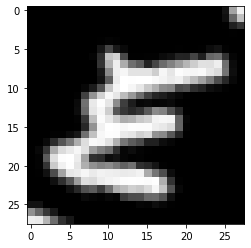

In [12]:
import matplotlib.pyplot as plt

test = preprocessing(X_train[5])
plt.imshow(test, cmap=plt.cm.gray)

In [9]:
import tensorflow as tf

cnn1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", input_shape=(28,28,1)),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(NUM_CLASSES),
    tf.keras.layers.Activation("softmax")
])

cnn1.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(), metrics="accuracy")

In [10]:
cnn1.fit(X_train, y_train_ohe, batch_size=1000, epochs=50, shuffle=True, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50


InternalError: Graph execution error:

Detected at node 'StatefulPartitionedCall_2' defined at (most recent call last):
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/traitlets/config/application.py", line 985, in launch_instance
      app.start()
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-10-d1ac8acce42b>", line 1, in <module>
      cnn1.fit(X_train, y_train_ohe, batch_size=1000, epochs=50, shuffle=True, validation_data=(X_val, y_val), verbose=1)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/zech/miniconda3/envs/mlenv/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_2'
libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_2}}]] [Op:__inference_train_function_2226]